In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
dir = '/content/sample_data/petimages'

In [3]:
categories = ['Cat','Dog']

In [4]:
for category in categories:
  path = os.path.join(dir,category)

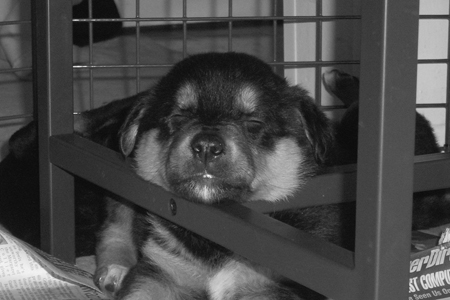

In [5]:
for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv2.imread(imgpath, 0)

        if pet_img is not None:
            cv2_imshow(pet_img)
        break

In [6]:
data = []

In [7]:
for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv2.imread(imgpath, 0)
        try:
            pet_img = cv2.resize(pet_img,(50,50))
            image = np.array(pet_img).flatten()

            data.append([image,label])
        except Exception as e:
            pass

print(len(data))

9695


In [8]:
pick_in = open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [9]:
pick_in = open('data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [10]:
random.shuffle(data)
features = []
labels = []

In [11]:
for feature ,label in data:
  features.append(feature)
  labels.append(label)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.01)

In [13]:
model = SVC(C=1, kernel='poly',gamma= 'auto')
model.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [39]:
with open('model.sav', 'rb') as file:
    model = pickle.load(file)

In [40]:
prediction = model.predict(xtest)
accuracy = model.score(xtest,ytest)

In [42]:
categories = ['Cat','Dog']

Accuracy:  0.6185567010309279
Prediction is:  Dog


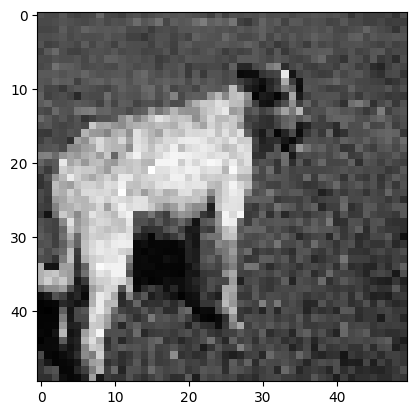

In [43]:
print('Accuracy: ',accuracy)
print('Prediction is: ',categories[prediction[0]])
mypet = xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()